# Phân tích cấu trúc dữ liệu GTSRB (German Traffic Sign Recognition Benchmark)

## 1. Số lượng lớp (số lượng nhãn)
- GTSRB có **43 lớp** (class), mỗi lớp tương ứng với một loại biển báo giao thông khác nhau.
- Mỗi lớp được đánh số từ 0 đến 42.

## 2. Định dạng ảnh
- Ảnh gốc có định dạng **PPM** (Portable Pixmap Format).
- Kích thước ảnh không đồng nhất, thường dao động từ 15x15 đến 250x250 pixels.
- Ảnh là ảnh màu (RGB).

## 3. Cấu trúc thư mục
- Dữ liệu huấn luyện nằm trong: `data/GTSRB/Final_Training/Images/`
  - Mỗi thư mục con (ví dụ: `00000`, `00001`, ..., `00042`) là một lớp, chứa các ảnh thuộc lớp đó.
- Dữ liệu kiểm tra nằm trong: `data/GTSRB/Final_Test/Images/`
  - Tất cả ảnh test nằm chung một thư mục.
- Thường đi kèm file CSV chứa thông tin nhãn, bounding box, v.v.

## 4. Thông tin nhãn
- Với tập train, nhãn được xác định qua tên thư mục chứa ảnh.
- Với tập test, nhãn thực tế thường nằm trong file CSV (ví dụ: `GT-final_test.csv`).

## 5. Số lượng ảnh
- Tổng số ảnh train: khoảng 39.000 ảnh.
- Tổng số ảnh test: khoảng 12.600 ảnh.

## 6. Một số lưu ý khác
- Ảnh có thể cần resize về cùng kích thước (thường dùng 32x32 hoặc 48x48).
- Nên chuẩn hóa giá trị pixel về [0, 1] hoặc [-1, 1] khi huấn luyện.

In [1]:
import os
import glob
import pandas as pd
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def count_images_per_class(train_dir):
    """
    Đếm số lượng ảnh trong mỗi lớp của tập train.
    """
    class_counts = {}
    for class_folder in sorted(os.listdir(train_dir)):
        class_path = os.path.join(train_dir, class_folder)
        if os.path.isdir(class_path):
            num_images = len(glob.glob(os.path.join(class_path, '*.ppm')))
            class_counts[class_folder] = num_images
    return class_counts

def plot_sample_images(train_dir, classes=None, samples_per_class=5):
    """
    Hiển thị một số ảnh mẫu cho mỗi lớp.
    """
    if classes is None:
        classes = sorted(os.listdir(train_dir))
    plt.figure(figsize=(samples_per_class * 2, len(classes) * 2))
    for i, class_folder in enumerate(classes):
        class_path = os.path.join(train_dir, class_folder)
        image_files = glob.glob(os.path.join(class_path, '*.ppm'))[:samples_per_class]
        for j, img_path in enumerate(image_files):
            img = Image.open(img_path)
            plt.subplot(len(classes), samples_per_class, i * samples_per_class + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.ylabel(class_folder, fontsize=10)
    plt.tight_layout()
    plt.show()

def get_image_size_distribution(train_dir, max_samples=10000):
    """
    Thống kê kích thước ảnh phổ biến trong tập train.
    """
    sizes = []
    for class_folder in sorted(os.listdir(train_dir)):
        class_path = os.path.join(train_dir, class_folder)
        image_files = glob.glob(os.path.join(class_path, '*.ppm'))
        for img_path in image_files[:max_samples]:
            with Image.open(img_path) as img:
                sizes.append(img.size)
    return Counter(sizes)

def read_test_labels_csv(csv_path):
    """
    Đọc nhãn test từ file CSV.
    """
    df = pd.read_csv(csv_path, sep=';')
    return df



{'00000': 210, '00001': 2220, '00002': 2250, '00003': 1410, '00004': 1980, '00005': 1860, '00006': 420, '00007': 1440, '00008': 1410, '00009': 1470, '00010': 2010, '00011': 1320, '00012': 2100, '00013': 2160, '00014': 780, '00015': 630, '00016': 420, '00017': 1110, '00018': 1200, '00019': 210, '00020': 360, '00021': 330, '00022': 390, '00023': 510, '00024': 270, '00025': 1500, '00026': 600, '00027': 240, '00028': 540, '00029': 270, '00030': 450, '00031': 780, '00032': 240, '00033': 689, '00034': 420, '00035': 1200, '00036': 390, '00037': 210, '00038': 2070, '00039': 300, '00040': 360, '00041': 240, '00042': 240}


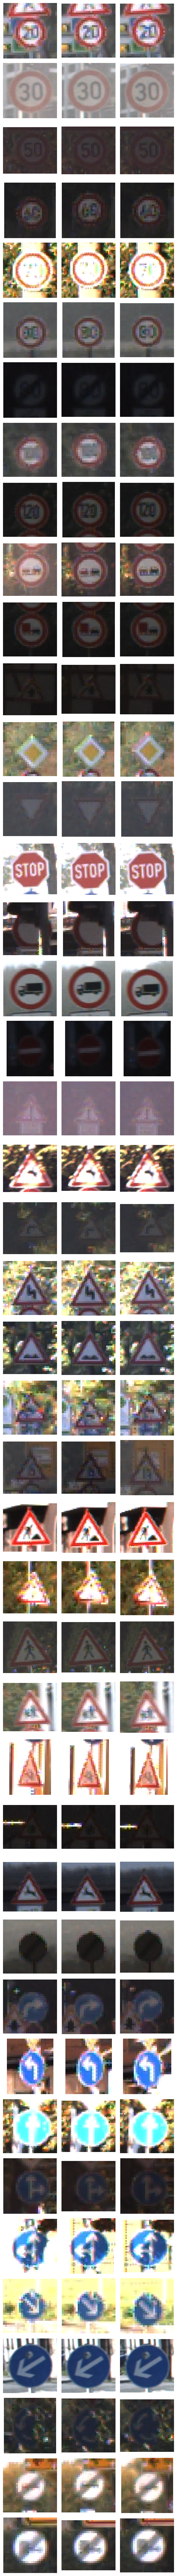

Counter({(31, 31): 396, (30, 30): 380, (35, 35): 360, (32, 32): 352, (33, 33): 351, (38, 38): 345, (34, 34): 339, (29, 29): 338, (30, 31): 337, (36, 36): 334, (32, 33): 326, (33, 34): 318, (37, 37): 310, (29, 30): 297, (40, 40): 297, (34, 35): 280, (31, 32): 276, (35, 36): 273, (43, 43): 265, (28, 28): 263, (34, 33): 262, (39, 39): 262, (36, 37): 262, (41, 41): 259, (38, 39): 249, (28, 29): 247, (31, 30): 243, (39, 40): 238, (37, 38): 229, (40, 41): 229, (35, 34): 229, (32, 31): 228, (33, 32): 222, (37, 36): 210, (42, 42): 210, (30, 29): 204, (38, 37): 199, (36, 35): 196, (27, 27): 194, (27, 28): 193, (44, 44): 188, (39, 38): 183, (41, 42): 177, (40, 39): 174, (29, 28): 173, (41, 40): 161, (46, 46): 161, (42, 43): 160, (30, 32): 158, (45, 45): 158, (48, 48): 156, (44, 45): 147, (42, 41): 147, (47, 47): 145, (34, 36): 144, (43, 42): 143, (46, 47): 142, (31, 33): 136, (52, 52): 135, (28, 27): 134, (49, 49): 133, (43, 44): 129, (29, 31): 125, (44, 43): 125, (45, 46): 125, (28, 30): 124, (

In [6]:
# Ví dụ sử dụng:
train_dir = '../data/GTSRB/Final_Training/Images'
test_dir = '../data/GTSRB/Final_Test/Images'
test_csv = '../data/GTSRB/Final_Test/GT-final_test.csv'
print(count_images_per_class(train_dir))
plot_sample_images(train_dir, samples_per_class=3)
print(get_image_size_distribution(train_dir))
test_labels = read_test_labels_csv(test_csv)
print(test_labels.head())

# Data preprocessing

In [8]:
import numpy as np
from PIL import Image
import glob
import os

In [9]:
def load_and_preprocess_image(img_path, size=(32, 32)):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(size)
    img = np.array(img) / 255.0  # Chuẩn hóa về [0, 1]
    return img

def preprocess_dataset(train_dir, size=(32, 32)):
    X = []
    y = []
    for class_folder in sorted(os.listdir(train_dir)):
        class_path = os.path.join(train_dir, class_folder)
        if os.path.isdir(class_path):
            for img_file in glob.glob(os.path.join(class_path, '*.ppm')):
                X.append(load_and_preprocess_image(img_file, size))
                y.append(int(class_folder))
    X = np.array(X)
    y = np.array(y)
    return X, y

In [10]:
# Sử dụng:
X_train, y_train = preprocess_dataset(train_dir, size=(32, 32))

In [11]:
X_train.shape, y_train.shape

((39209, 32, 32, 3), (39209,))

In [ ]:
sign_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)', 
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}




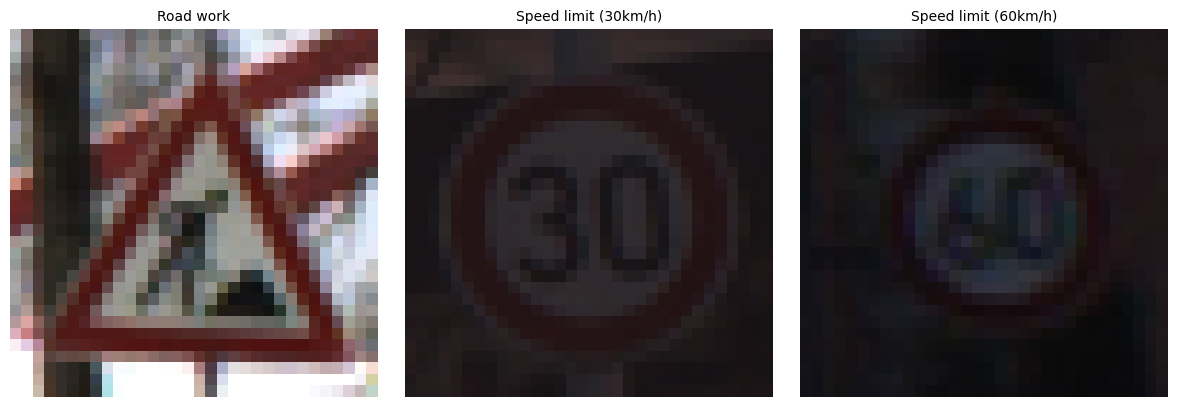

In [16]:
# Hiển thị một số ví dụ với tên biển báo
plt.figure(figsize=(12, 4))
indices = np.random.randint(0, len(X_train), 3)

for i, idx in enumerate(indices):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_train[idx])
    plt.title(f'{sign_names[y_train[idx]]}', fontsize=10, wrap=True)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [17]:
# Chia tập validation từ tập train
from sklearn.model_selection import train_test_split

# Chia 20% tập train làm validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Kích thước tập train:", X_train.shape, y_train.shape)
print("Kích thước tập validation:", X_val.shape, y_val.shape)


Kích thước tập train: (31367, 32, 32, 3) (31367,)
Kích thước tập validation: (7842, 32, 32, 3) (7842,)


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model

def build_resnet_model(input_shape, num_classes, learning_rate=0.001):
    """
    Xây dựng mô hình CNN sử dụng ResNet50 pretrained cho phân loại biển báo.

    Args:
        input_shape (tuple): Kích thước của ảnh đầu vào (ví dụ: (32, 32, 3)).
        num_classes (int): Số lượng lớp biển báo (ví dụ: 43).
        learning_rate (float): Tốc độ học cho optimizer.

    Returns:
        tf.keras.models.Model: Mô hình Keras đã được compile.
    """

    # Tải ResNet50 pretrained trên ImageNet, bỏ lớp classification cuối cùng
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Đóng băng các lớp của base model (không huấn luyện lại)
    base_model.trainable = False

    # Xây dựng các lớp tùy chỉnh phía trên base model
    inputs = Input(shape=input_shape)
    # Đảm bảo đầu vào được xử lý đúng bởi ResNet50 (ResNet50 có hàm preprocess_input riêng)
    x = tf.keras.applications.resnet50.preprocess_input(inputs)
    x = base_model(x, training=False) # Chạy base_model ở chế độ inference
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)  # Thêm dropout để giảm overfitting
    outputs = Dense(num_classes, activation='softmax')(x)

    # Tạo mô hình hoàn chỉnh
    model = Model(inputs=inputs, outputs=outputs)

    # Compile mô hình
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', # Vì nhãn là số nguyên
                  metrics=['accuracy'])

    return model


KeyboardInterrupt: 

In [ ]:
# ---- Ví dụ sử dụng ----
# INPUT_SHAPE = (32, 32, 3) # Cần khớp với kích thước ảnh đã tiền xử lý
# NUM_CLASSES = 43         # Số lớp của GTSRB

# model = build_resnet_model(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)

# # In cấu trúc mô hình
# model.summary()